In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 2:  Forms of Error



## Question 1

Consider the expression
$$
    f(x) = \frac{1}{x - 1}
$$

**(a)** [10] Expand $f(x)$ in a Taylor series representation about $x_0 = 0$.

$ f(x) = \frac{1}{x - 1}, f'(x) = \frac{-1}{(x - 1)^2}, f''(x) = \frac{2}{(x - 1)^3}, f'''(x) = \frac{-6}{(x - 1)^4} $

Generalized formula for $f^n (x)$
$$f^n(x) = \frac{(-1)^n (n!)}{(x - 1)^{n + 1}}$$

Apply formula to Taylor Series Expansion
$$ 
    f(x) = \sum_{n = 0}^{\infty} \frac{f^n(x_0)}{n!} (x - x_0)^n \\
    f(x) = \sum_{n = 0}^{\infty} \frac{\frac{(-1)^n (n!)}{(x_0 - 1)^{n + 1}}}{n!} (x - x_0)^n \\
    f(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n (x - x_0)^n}{(x_0 - 1)^{n + 1}}
$$

Apply $x_0 = 0$
$$ 
    f(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n x^n}{(-1)^{n + 1}} \\
    f(x) = -\sum_{n = 0}^{\infty} x^n \\
    T_N(x) = -\sum_{n = 0}^{N} x^n
$$

**(b)** [5] What is the expected operation count if we truncate the series to $N$ terms?  Simplify the power to multiplications rather than something more exotic.  Stating the answer in terms of big-O notation is fine.

$$
    T_N(x) = -\sum_{n = 0}^{N} x^n \\
    T_N(x) = -1 - x - x^2 - x^3 - ... - x^N \\
    T_N(x) = -1 - x - (x \cdot x) - (x \cdot x \cdot x) - ... (x \cdot x \cdot x ... \cdot x)
$$

The standard method of computing this sum requires $O(\frac{N^2}{2})$ operations. 

Comparatively, if we use Horner's Method, this sum can be factored and rewritten as:

$$
    T_N(x) = -1(1 + x(1 + x(1 + x(1 + x(...))))) \\
$$

For example, $T_4(x)$ would look like:
$$
    T_4(x) = -1(1 + x(1 + x(1 + x(1 + x))))
$$

Now, instead of $O(\frac{N^2}{2})$ multiplications, computing the sum requires $O(N)$ multiplications, which is a significant improvement.

**(c)** [15] Make two plots of the relative error of the approximation vs. the true value of the function.  In the first pick a value to evaluate both functions at keeping $x_0 \neq x$ but vary the number of terms you keep ($N$).  In the second fix $N$ and vary $x$.  Explain what you observe.  

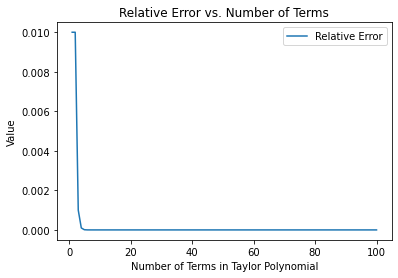

<ipython-input-2-423184890a0f>:53: RuntimeWarning: divide by zero encountered in double_scalars
  trueval = [(1 / (x_0 - 1)) for x_0 in x]
<ipython-input-2-423184890a0f>:24: RuntimeWarning: invalid value encountered in double_scalars
  return abs(computed - actual)/abs(actual)


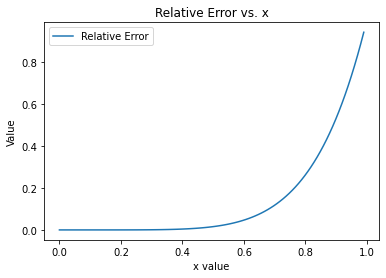

In [2]:
# YOUR CODE HERE

""" Plot #1 
    Relative Error of the Approximation vs. True Value of the Function
    Pick a value to evaluate both functions at, keeping x_0 \neq x
    Vary the number of terms N
"""

def taylor(N, x):

  total_sum = -1
  count = 1

  while count <= N:
    
    total_sum = total_sum * x - 1
    #total_sum -= x**count
    count += 1

  return total_sum

def rel_error(computed, actual):

  return abs(computed - actual)/abs(actual)

x_0 = 0.1
trueval = 1 / (x_0 - 1)

N = numpy.linspace(1, 100, 101)
T_N = [taylor(number, x_0) for number in N]
error = [rel_error(computed, trueval) for computed in T_N]
actual = [trueval]*len(N)

#plt.plot(N, T_N, label="Taylor Approximation")
plt.plot(N, error, label="Relative Error")
#plt.plot(N, actual, label="Actual Value")
plt.xlabel("Number of Terms in Taylor Polynomial")
plt.ylabel("Value")
plt.title("Relative Error vs. Number of Terms")

plt.legend()
plt.show()
# raise NotImplementedError()


""" Plot # 2
    Fixed number of terms N
    Value of x changing
"""

N = 5
x = numpy.linspace(0, 1, 100)
trueval = [(1 / (x_0 - 1)) for x_0 in x]
T_N = [taylor(N, x_0) for x_0 in x]
error = [rel_error(computed, actual) for (computed, actual) in zip(T_N, trueval)]

#plt.plot(x, T_N, label= "Taylor Approximation")
plt.plot(x, error, label= "Relative Error")
#plt.plot(x, trueval, label="Actual Value")

plt.xlabel("x value")
plt.ylabel("Value")
plt.title("Relative Error vs. x")

plt.legend()
plt.show()

YOUR ANSWER HERE 

As seen in the first plot, the relative error decreases exponentially as the number of terms N increases. This behavior is expected, as the relative error should approach 0 as N approaches $\infty$. 

In the second plot, for a fixed value of N = 10 and values of x ranging from 0 to 2, we see that the relative error is approximately 0 for values of x between 0 and 1, but increases exponentially for x > 1. The error increases drastically, as the Taylor Series approximation for x is only valid when $|x| < 1$.

## Question 2

**(a)** [5] Consider the following two equivalent sums:

$$
    \sum^\infty_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^\infty_{n=1} \frac{1}{n (n + 1)}
$$

Write two Python functions that compute each of these sums but to a finite number of terms $N$.

In [3]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # YOUR CODE HERE
    
    Sn = 0
    n = 1
    
    while n <= N:
        
        Sn += (1/n) - (1/(n + 1))
        n += 1

    return Sn


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # YOUR CODE HERE
    
    Sn = 0
    n = 1
    
    while n <= N:
        
        Sn += 1/(n*(n + 1))
        n += 1
    
    return Sn

In [4]:
for N in range(5, 21, 5):
    numpy.testing.assert_allclose(sum_1(N), sum_2(N))
print("Success!")

Success!


**(b)** [5] Compute the absolute error between the two summation approaches.

In [5]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    return abs(sum_1(N) - sum_2(N))

In [6]:
N = numpy.logspace(1, 7, 7, dtype=int)
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.zeros(answer.shape), atol=1e-10)
print("Success!")

Success!


**(c)** [10] Plot the relative and absolute error versus $N$ up to large $N$ (above at least $10^4$).  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

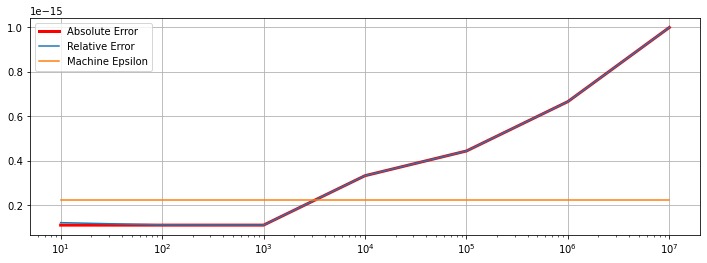

In [7]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

# YOUR CODE HERE

N = numpy.logspace(1, 7, 7, dtype=int)
abs_err = [abs_error(n) for n in N]
rel_err = [err/sum_1(n) for (err, n) in zip(abs_err, N)]
epsilon = [numpy.finfo(float).eps for n in N]

plt.semilogx(N, abs_err, label="Absolute Error", color="red", linewidth="3")
plt.semilogx(N, rel_err, label="Relative Error")
plt.semilogx(N, epsilon, label="Machine Epsilon")
plt.legend()
plt.grid()

# raise NotImplementedError()
plt.show()

**(d)** [5] Theorize what may have lead to the differences in answers.

Error may exist between the two summation approaches due to floating point error. In the LHS, there are 4 operations each with their own floating point error (division of $\frac{1}{n}$, addition of $n + 1$, division of $\frac{1}{n + 1}$ and then subtraction of $\frac{1}{n} - \frac{1}{n + 1}$) where as the other summation on the RHS has 3 operations (addition of $n + 1$, multiplication of $n(n + 1)$ and then division of $\frac{1}{n(n + 1)}$). These differences may lead to errors between the two sums, especially as the number of terms increases, these errors compound as well. 

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** [10] Derive the upper bound on the *relative error* $r_n$ assuming that $0 < x$ and

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

YOUR ANSWER HERE

$R_n(x)$ is the residual term where:

$$ 
    e^x = T_n(x) + R_n(x) \\
    R_n(x) = e^x - T_n(x) \\
    R_n(x) = \frac{f^{n + 1}(c)(x - x_0)^{n + 1}}{(n + 1)!} 
$$

The relative error is defined as:

$$
    r_n(x) = \frac{|e^x - T_n(x)|}{|e^x|} \\
    r_n(x) = \frac{|R_n(x)|}{|e^x|} \\
    r_n(x) = \frac{\frac{f^{n + 1}(c)(x - x_0)^{n + 1}}{(n + 1)!}}{|e^x|} \\
    r_n(x) = \frac{f^{n + 1}(c)(x - x_0)^{n + 1}}{(n + 1)!|e^x|} 
$$

By our initial definition of the Taylor polynomial, we have $x_0 = 0$ which we can apply here:

$$
    r_n(x) = \frac{f^{n + 1}(c)x^{n + 1}}{(n + 1)!|e^x|} 
$$

Apply $f^{n + 1}(x) = e^x$ for all n

$$
    r_n(x) = \frac{e^c x^{n + 1}}{(n + 1)!|e^x|} 
$$

Compare $r_n(x)$ with $R_n(x) = \frac{e^c x^{n + 1}}{(n + 1)!}$. 

We know $R_n(x)$ is bounded by some value $M$ which is the upper bound on $\frac{e^c}{(n + 1)!}$. 

We thus have:
$$
    r_n(x) = \frac{e^c x^{n + 1}}{(n + 1)!|e^x|}  \leq |\frac{x^{n + 1}}{(n + 1)!}|
$$

**(b)** [10] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

YOUR ANSWER HERE

$$
    r_n \leq \epsilon_{machine} \\
    \frac{x^{n+1}}{(n+1)!} \leq \epsilon_{machine} \\
    x^{n+1} < (n+1)!
$$

If we take the log of both sides and apply Stirling's Approximation:

$$
    log(x^{n+1}) < log((n+1)!) \\ 
    (n + 1)log(x) < (n + 1)log(n + 1) - (n + 1) \\
$$

Divide both sides by $n + 1$

$$
    log(x) < log(n + 1) - 1 \\
    log(x) + 1 < log(n + 1) 
$$

Apply $log(e) = 1$ and $log(n + 1) \approx log(n)$ for large n:

$$
    log(x) + log(e) < log(n) \\
    log(e \cdot x) < log(n) \\
    n > e \cdot x
$$

**(c)** [10] Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [8]:
# HINT: Think about how we evaluated polynomials efficiently in class

import scipy.misc as misc

def Tn_exp(x, tolerance=1e-3):

    MAX_N = 100
    
    # YOUR CODE HERE

    N = 0
    Tn = 0
    Tapprox = 0

    while N < MAX_N:
      
      Tapprox = numpy.ones(x.shape)      
      counter = 0

      while counter < N:

        Tapprox *= x
        
        if (N - counter > 0):
          Tapprox = Tapprox / (N - counter)

        Tapprox += 1
        counter += 1


      rel_error = numpy.abs(Tapprox - numpy.exp(x)) / numpy.abs(numpy.exp(x))
      if (numpy.all(rel_error < tolerance)):
        Tn = Tapprox
        break
    
      N += 1

    # raise NotImplementedError()
    
    return Tn, N

In [9]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print("Success!")

Success!


## Question 4

[5] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


For the sum and product of small values of x, like $\Delta x$, the order of approximation is: 
$$ 
    f(\Delta x) = \frac{1}{1 - \Delta x} = p(\Delta x) + O(\Delta x^4) \\
    g(\Delta x) = \cosh(\Delta x) = q(\Delta x) + O(\Delta x^6) \\
    r = min(4, 6) = 4
$$

The order of approximation is 4 for both the sum and product. 

Both the sum and product operations have an order of $O(\Delta x^4)$

### Addition of functions:

$\frac{1}{1-\Delta x} + \cosh \Delta x = (1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)) + (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6))$

$\frac{1}{1-\Delta x} + \cosh \Delta x = 2 + \Delta x + \Delta x^3 + \frac{3\Delta x^2}{2} + \frac{\Delta x^4}{24} + \mathcal{O}(\Delta x^4)$

order of $O(\Delta x^4)$

### Multiplication of functions:


$\frac{1}{1-\Delta x} * \cosh \Delta x = (1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4))(1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6))$

$\frac{1}{1-\Delta x} * \cosh \Delta x = 1 + x + \frac{3}{2}x^2 + \frac{1}{2}x^3 + \frac{13}{24}x^4 + \frac{1}{24}x^5 + \frac{1}{24}x^6 + \mathcal{O}(\Delta x^4)$

order of $O(\Delta x^4)$

## Question 5

Consider the operation
$$\begin{aligned}
    f(x,y) = \frac{1}{x + y}
\end{aligned}$$
for the following questions.

**(a)** [5] Estimate the relative error due to floating point approximations to the representation of the numbers assuming exact operations.

YOUR ANSWER HERE
$$
    fl(x + y) = x(1 + \delta_x) + y(1 + \delta_y) \\
    fl(\frac{1}{x + y}) = \frac{1}{x(1 + \delta_x) + y(1 + \delta_y)} \\
    fl(\frac{1}{x + y}) = \frac{1}{x + x\delta_x + y + y\delta_y} \\
    fl(\frac{1}{x + y}) = \frac{1}{(x + y)(1 + \frac{x\delta_x + y\delta_y}{x + y})}
$$

Use the floating point error to compute the relative error:
$$
    \frac{\frac{1}{x + y} - \frac{1}{(x + y)(1 + \frac{x\delta_x + y\delta_y}{x + y})}}{\frac{1}{x + y}}
$$

Factor out a $\frac{1}{x + y}$ to get
$$
    1 - \frac{1}{1 + \frac{x\delta_x + y\delta_y}{x + y}}
$$

This results in a catastrophic cancellation, because the relative error is dependent on the sum $x + y$ which could result in an error that is arbitrarily large.

**(b)** [5] Demonstrate this behavior by plotting the relative error.

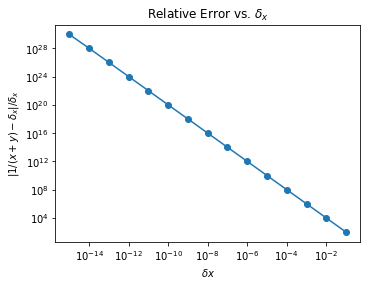

In [10]:
# YOUR CODE HERE

dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
error = numpy.abs((1/(x + y)) - dx) / (dx)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 2)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\delta x$")
axes.set_ylabel("$|1/(x + y) - \delta_x| / \delta_x$")
axes.set_title("Relative Error vs. $\delta_x$")

plt.show()


# raise NotImplementedError()